# Foot detection testing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from sklearn.cluster import AffinityPropagation

In [5]:
scan = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.062000036239624, 1.0460000038146973,
 1.0269999504089355, 1.0199999809265137, 1.00600004196167, 0.9959999918937683,
 0.9819999933242798, 0.9710000157356262, 0.9580000042915344, 0.949999988079071,
 0.9390000104904175, 0.9309999942779541, 0.9200000166893005, 0.9129999876022339,
 0.9049999713897705, 0.8960000276565552, 0.8889999985694885, 0.8830000162124634,
 0.8769999742507935, 0.8700000047683716, 0.8640000224113464, 0.859000027179718,
 0.8529999852180481, 0.8479999899864197, 0.8450000286102295, 0.8399999737739563,
 0.8370000123977661, 0.8320000171661377, 0.8289999961853027, 0.8240000009536743,
 0.8220000267028809, 0.8190000057220459, 0.8159999847412109, 0.8130000233650208,
 0.8040000200271606, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8119999766349792,
 0.8069999814033508, 0.8069999814033508, 0.8080000281333923, 0.8090000152587891,
 0.8100000023841858, 0.8109999895095825, 0.8130000233650208, 0.8149999976158142,
 0.8180000185966492, 0.8209999799728394, 0.8209999799728394, 0.8259999752044678,
 0.828000009059906, 0.8330000042915344, 0.8379999995231628, 0.8410000205039978,
 0.8450000286102295, 0.8500000238418579, 0.8550000190734863, 0.8600000143051147,
 0.8669999837875366, 0.875, 0.8830000162124634, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 1.0140000581741333, 0.0, 1.0410000085830688, 1.0570000410079956,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.7200000286102295, 0.703000009059906, 0.6899999976158142,
 0.6830000281333923, 0.6790000200271606, 0.6790000200271606, 0.0, 0.0, 0.0, 0.0,
 0.8149999976158142, 0.8190000057220459, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [6]:
def laserToCart(scan):
    for ang, dist in enumerate(scan[0:-1]):
        ang += 180
        if dist == 0.0:
            continue
        x = dist * np.cos(ang * np.pi / 180)
        y = dist * np.sin(ang * np.pi / 180)
        try:
            pts = np.append(pts, [[x,y]], axis=0)
        except:
            pts = np.asarray([[x,y]])
    return (pts)

In [33]:
X = laserToCart(scan)

[array([ -7.50947427e-01,  -7.26612658e-01,  -7.00412282e-01,
         -6.82513206e-01,  -6.59995411e-01,  -6.40216454e-01,
         -6.17992620e-01,  -5.97807302e-01,  -5.76538795e-01,
         -5.58395983e-01,  -5.38588280e-01,  -5.20608590e-01,
         -5.01067921e-01,  -4.83816282e-01,  -4.66109443e-01,
         -4.48000014e-01,  -4.30995752e-01,  -4.14543398e-01,
         -3.98149657e-01,  -3.81382900e-01,  -3.65142188e-01,
         -3.49386787e-01,  -3.33293647e-01,  -3.17666387e-01,
         -3.02820928e-01,  -2.87296911e-01,  -2.72500549e-01,
         -2.57102145e-01,  -2.42376142e-01,  -2.27125181e-01,
         -2.12749262e-01,  -1.98134034e-01,  -1.83560057e-01,
         -1.69032209e-01,  -1.53410436e-01,  -4.24967952e-02,
         -2.81638932e-02,  -1.40840917e-02,  -1.48427197e-16,
          1.41189971e-02,   2.82685924e-02,   4.24444600e-02,
          5.67120148e-02,   7.10319301e-02,   8.55042849e-02,
          1.00054728e-01,   1.14261113e-01,   1.29214864e-01,
        

In [8]:
x, y = np.transpose(pts)

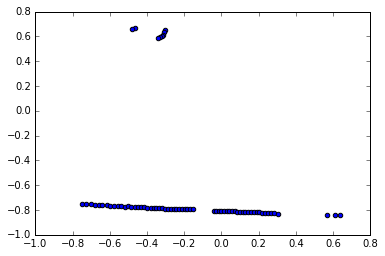

In [9]:
plt.scatter(x, y)

In [28]:
clustering = AffinityPropagation()

In [29]:
clustering.fit(pts)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [30]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4])

In [40]:
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

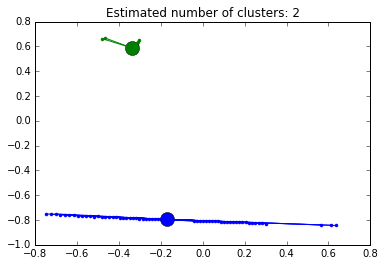

In [41]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [42]:
af.cluster_centers_

array([[-0.16903221, -0.79523402],
       [-0.33950001,  0.58803127]])

In [43]:
af.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1])

In [44]:
from collections import Counter

In [55]:
aa = Counter(af.labels_)

In [65]:
max_v = 0
max_k = None
for k, v in Counter(af.labels_).items():
    if v > max_v:
        max_v = v
        max_k = k
max_k

0

In [67]:
def thing(a, b):
    if a[1] >= b[1]:
        return a[0]
    else:
        return b[0]
    
reduce(thing, aa.iteritems())

0

In [49]:
reduce(lambda m, n: if)

In [56]:
a.itervalues()

<dictionary-valueiterator at 0x7fc3b17bc208>

In [57]:
import numpy as np

In [66]:
aa

Counter({0: 62, 1: 8})

In [68]:
bb = 'asdfkjasdfkjhasdklfhkalsdfhklasdfkjlasdhkjlsdakfkjlasdkhfaskh'

In [71]:
bb = Counter(bb)

In [76]:
def thing(a, b):
    if a[1] >= b[1]:
        return a
    else:
        return b
    
reduce(thing, bb.iteritems())

('k', 11)

In [75]:
list(bb.iteritems())

[('a', 9),
 ('d', 8),
 ('f', 7),
 ('h', 6),
 ('k', 11),
 ('j', 5),
 ('l', 6),
 ('s', 9)]